<a href="https://colab.research.google.com/github/ZeeMurphy/Data110/blob/main/ZivarSMurphy_Week5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Assignment: Uncovering Insights from the Titanic Dataset
#Loading the dataset:
import seaborn as sns
import pandas as pd
import numpy as np

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##**Part 1:** Understanding the Dataset :
**Dataset Overview**
We run, head, describe and type functions to get the overall information about the content of the dataset.


In [2]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
rows, columns = titanic.shape
print(f"the dataset has {rows} and {columns}")

the dataset has 891 and 15


In [4]:
#Briefly describe the Titanic dataset. What kind of information is contained in each column?
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


  **Briefly describe the Titanic dataset. What kind of information is contained in each column?**
The Titanic dataset is a well-known dataset that contains information about the passengers aboard the Titanic. It includes 15 columns with various data points about each passenger. The columns are:
**The dataset has 891 rows and 15 columns.**
- **survived:** A binary column indicating whether the passenger survived (1) or not (0).
- **pclass:** The passenger class (1st, 2nd, or 3rd class).
- **sex:** Gender of the passenger (male or female).
- **age:** Age of the passenger in years.
- **sibsp:** Number of siblings or spouses aboard the Titanic.
- **parch:** Number of parents or children aboard the Titanic.
- **fare:** The fare paid by the passenger for their ticket.
- **class:** Passenger class (1st, 2nd, 3rd), a categorical version of the pclass column.
- **who:** Describes whether the passenger is male, female, or a child.
- **adult_male:** A binary column indicating whether the passenger is an adult male (True or False).
- **embarked:** The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).
- **deck:** The deck level where the passenger’s cabin was located.
- **embark_town:** The town name corresponding to the embarked column.
- **alive:** Indicates whether the passenger was alove (yes) or dead (no).
- **alone:** Indicates whether the passenger was traveling alone (True) or with family (False).

#Deliverable: Write a paragraph summarizing the dataset based on your exploration.
This dataset provides demographic and socio-economic information about passengers, helping in the analysis of survival factors based on class, age, gender, and family connections.

##**Part 2:** Fare and Survival Analysis
#####**Task 2: Fare Distribution**

- Plot a histogram and KDE for the distribution of fares paid by passengers.


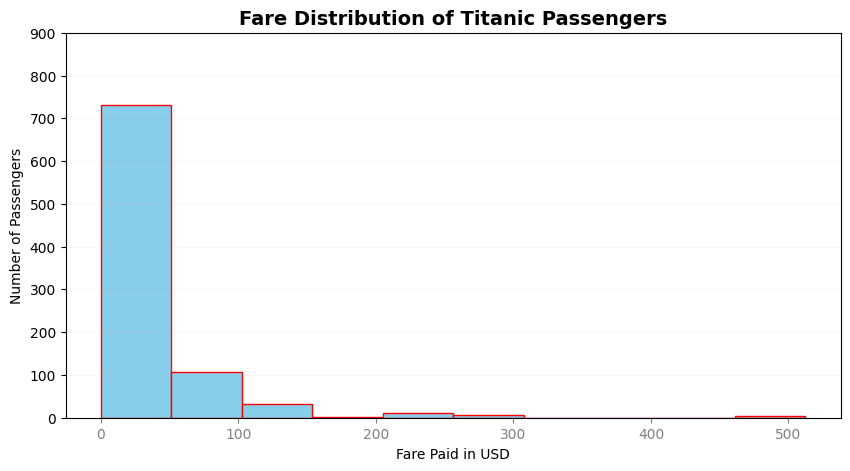

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10,5))
plt.hist(titanic['fare'], edgecolor='red', color='skyblue')
plt.title('Fare Distribution of Titanic Passengers', fontsize=14, weight='bold')
plt.xlabel('Fare Paid in USD')
plt.ylabel('Number of Passengers')
plt.tick_params(axis='x', colors='gray')
plt.yticks([0,100,200,300,400,500,600,700,800,900])
plt.grid(axis='y', alpha=0.09)



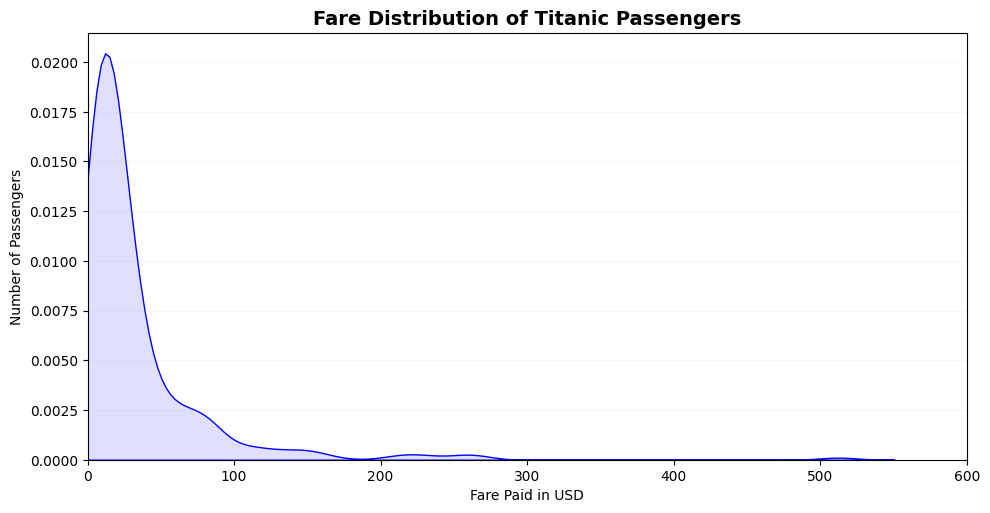

In [6]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=titanic['fare'], color='blue', fill=True, alpha=0.125)
plt.xlim(0,600)
plt.tight_layout()
plt.title('Fare Distribution of Titanic Passengers', fontsize=14, weight='bold')
plt.xlabel('Fare Paid in USD')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', alpha=0.09)
plt.show()

- **Question: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?**
The fare distribution shows that majority of passengers paid the lowest fares and a small number of them paid significantly higher fares. Outliners in the fare distribution are the ones that paid highest value fares around $500. The statistic summary showed the highest fare paid was $512.
Higher fare-paying passengers (first class) usually have higher survivor rates compares to whose ones who paid the lower fares. Because they usually will have more access to lofeboats and their cabins would be located in better locations. Usually there is a positive correlation between fare amount of survival rates.


#####**3.Task 3: Fare and Survuval Rates**

- Create a KDE plot to compare the fare distributions for survivors and non-survivors.
Question: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

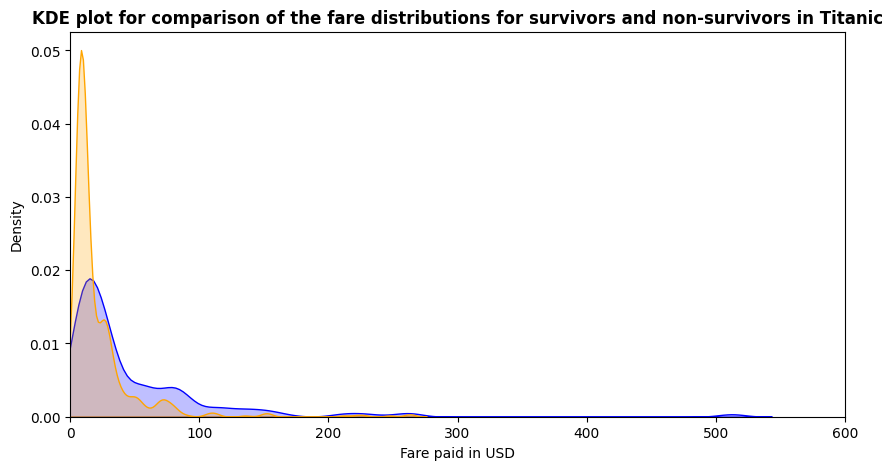

In [7]:
survivors=titanic[titanic['survived']==1]['fare']
nonsurvivors=titanic[titanic['survived']==0]['fare']
plt.figure(figsize=(10,5))
sns.kdeplot(survivors, fill=True, color='blue', label='survivors', bw_adjust=0.5)
sns.kdeplot(nonsurvivors, fill=True, color='orange', label='nonsurvivors', bw_adjust=0.5)
plt.title('KDE plot for comparison of the fare distributions for survivors and non-survivors in Titanic', fontsize=12, weight='bold')
plt.xlabel('Fare paid in USD')
plt.xlim(0,600)

plt.show()


Even though both curves are skewed to the right, the area under the curves shows that almost all passengers who paid above $300 survived. The non-survivors curve peaked significantly higher at lower fares, which indicates that a high number of passengers who paid lower fares did not survive. So, the survival rate significantly correlated with the amount of fare that passengers paid.
The skewness of both distributions shows that the majority of Titanic passengers were low-fare payers. The survival rate shows that passengers with a lower socioeconomic status had less access to survival resources. So socioeconomic status played a significant role in determining survival probabilities.


**Task 4: Passenger Class, Fare, and Survival**
Create histograms and KDE plots to compare fare distributions across different passenger classes (Pclass) and analyze survival rates for each class.
Question: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?

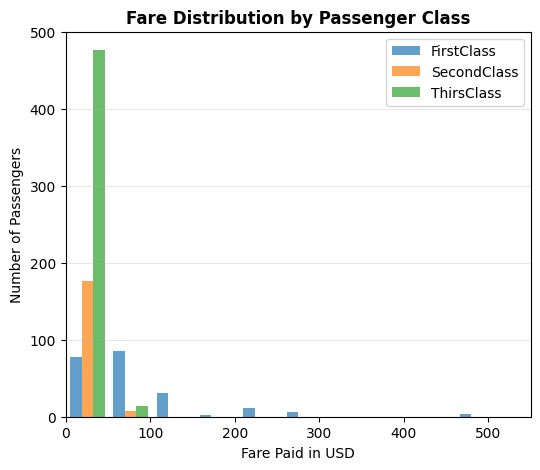

In [8]:
plt.figure(figsize=(6,5))
FirstClass=titanic[titanic['pclass']==1]['fare']
SecondClass=titanic[titanic['pclass']==2]['fare']
ThirdClass=titanic[titanic['pclass']==3]['fare']
plt.hist([FirstClass, SecondClass, ThirdClass], bins=10, alpha=0.7, label=['FirstClass', 'SecondClass', 'ThirsClass'])
plt.title('Fare Distribution by Passenger Class', fontsize=12, weight='bold')
plt.xlabel('Fare Paid in USD')
plt.ylabel('Number of Passengers')
plt.xlim(0, 550)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()


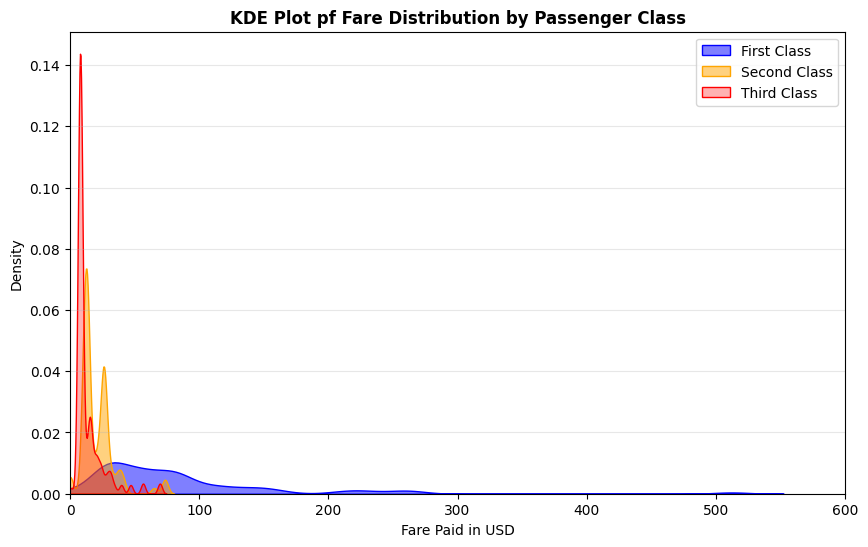

In [9]:
plt.figure(figsize=(10,6))
sns.kdeplot(FirstClass, fill=True, color='blue', label='First Class', alpha=0.5, bw_adjust=0.5)
sns.kdeplot(SecondClass, fill=True, color='orange', label='Second Class', alpha=0.5, bw_adjust=0.5)
sns.kdeplot(ThirdClass, fill=True, color='red', label='Third Class', alpha=0.3, bw_adjust=.5)
plt.title('KDE Plot pf Fare Distribution by Passenger Class', fontsize=12, weight='bold')
plt.xlabel('Fare Paid in USD', fontsize=10)
plt.xlim(0,600)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()



The histogram  of Fare Distribution by Passenger Class shows that majority of passegers were in third class with the lowest fair paid.

In [10]:
# Filter for third-class passengers who paid high fares (under 50 USD)
high_fare_third_class = titanic[(titanic['pclass'] == 1) & (titanic['fare'] < 100)]

# Display the relevant columns (Name, Pclass, and Fare)
high_fare_third_class[['pclass', 'fare']]



,pclass,fare
1,1,71.2833
3,1,53.1000
6,1,51.8625
11,1,26.5500
23,1,35.5000
...,...,...
871,1,52.5542
872,1,5.0000
879,1,83.1583
887,1,30.0000


When analyzing the relation between fare and class, we can see that actually a fair number of passengers (163 people) have paid between 30USD and 71USD but they were in First Class! So, for a precise analysis maybe studying the correlation between class and survival would be better.

In [11]:
# Count the number of people in first class
first_class_passengers = titanic[titanic['pclass'] == 1]

# Get the total number of first-class passengers
num_first_class_passengers = len(first_class_passengers)

print(f"Total number of first-class passengers: {num_first_class_passengers}")


Total number of first-class passengers: 216


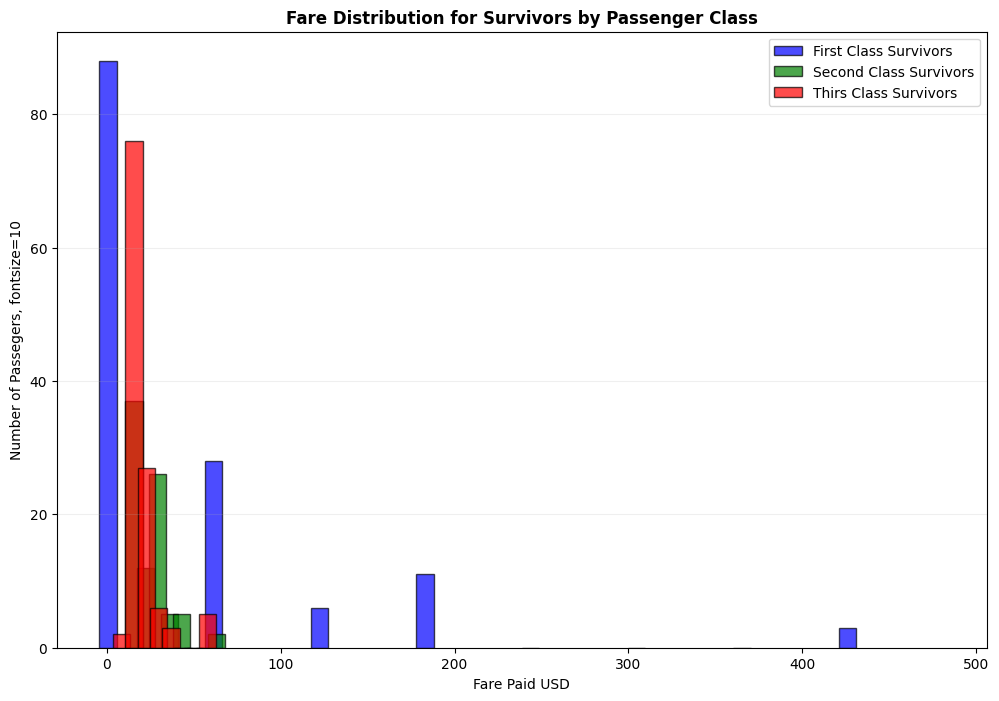

In [12]:
plt.figure(figsize=(12,8))
plt.hist(titanic[(titanic['pclass'] ==1) & (titanic['survived'] ==1)]['fare'], bins=8, label='First Class Survivors', color='blue', width=10,  align='left', edgecolor='black', alpha=0.7)
plt.hist(titanic[(titanic['pclass'] ==2) & (titanic['survived'] ==1)]['fare'], bins=8, label='Second Class Survivors', color='green', width=10, align='mid', edgecolor='black', alpha=0.7)
plt.hist(titanic[(titanic['pclass'] ==3) & (titanic['survived'] ==1)]['fare'], bins=8, label='Thirs Class Survivors', color='red', width=10, align='right', edgecolor='black', alpha=0.7)
plt.title('Fare Distribution for Survivors by Passenger Class', fontsize=12, weight='bold')
plt.xlabel('Fare Paid USD', fontsize=10)
plt.ylabel('Number of Passegers, fontsize=10')
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.show()

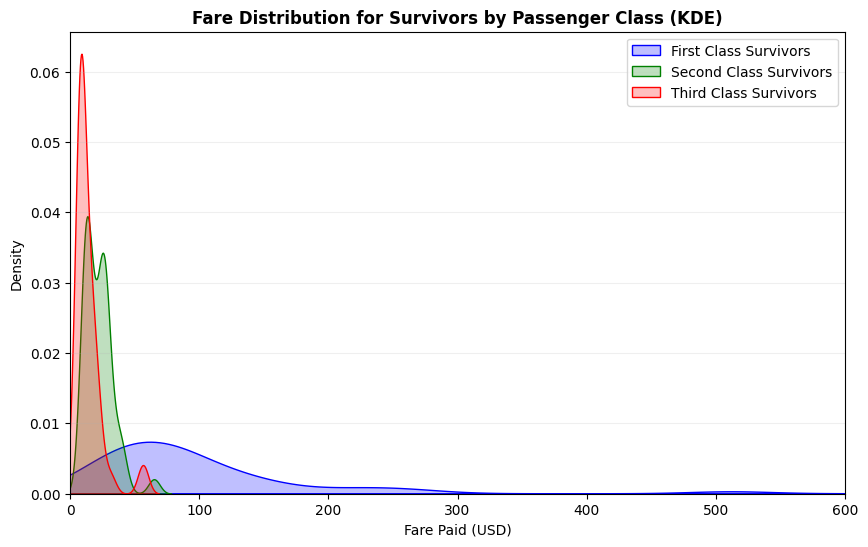

In [13]:
plt.figure(figsize=(10, 6))
# KDE plot for First Class Survivors
sns.kdeplot(titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 1)]['fare'],
            label='First Class Survivors', color='blue', fill=True)
# KDE plot for Second Class Survivors
sns.kdeplot(titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 1)]['fare'],
            label='Second Class Survivors', color='green', fill=True)
# KDE plot for Third Class Survivors
sns.kdeplot(titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 1)]['fare'],
            label='Third Class Survivors', color='red', fill=True)
plt.title('Fare Distribution for Survivors by Passenger Class (KDE)', fontsize=12, weight='bold')
plt.xlabel('Fare Paid (USD)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0,600)
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.show()

To analyze the **survival rates** and **fare distribution** across different passenger classes on the Titanic, we'll focus on a few observations that reveal how **socioeconomic divisions** influenced survival chances.
- **First Class** passengers paid the highest fares, with some paying over $500. The passengers in First Class had access to better rooms and were closer to lifeboards on the upper decks. This significantly increased their chance of survival.
- **Second class** passengers paid lower fares, typically between 20 and 100 USD. These passengers with intermediate fares, had moderately better survival chance compared to third class.
- **Third Class** passengers paid the lowest fares, often below 20USD. These passengers paid the lowest fares abd physically were farther from lofeboats and rescue operations so they had poor chance of survival.
The Titanic tragedy reflects how waltheir passengers ejoyed greater safety and priority, while lower-class passengers had disadvantage. This also shows the deep socioeconoic divides of 20th century its influence on every aspects of passengers experience, incluing life-and-death situation like this Titanic tragedy.


**Task 5: Age of Survivors and Non-Survivors**

Create KDE plots to compare the age distributions of survivors and non-survivors.
Question: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?

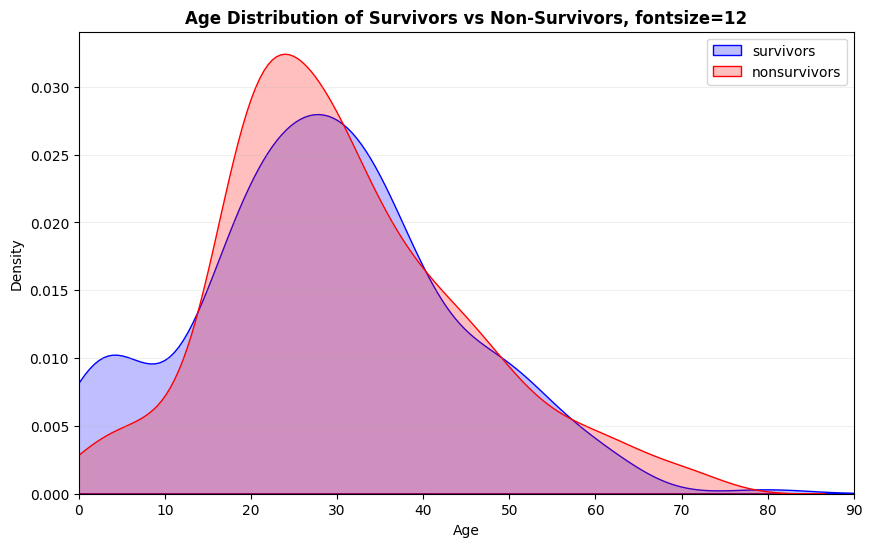

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(titanic[titanic['survived']==1]['age'], label='survivors', color='blue', fill=True)
sns.kdeplot(titanic[titanic['survived']==0]['age'], label='nonsurvivors', color='red', fill=True)
plt.title('Age Distribution of Survivors vs Non-Survivors, fontsize=12', weight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0,90)
plt.legend()
plt.grid(axis='y', alpha=0.2)
plt.tight_layout
plt.show()


**Interpretation of the KDE plot:**
- A significant portion of survivors were younger children (especially under 10) and young adults. This might be due to the "women and children first' protocol during the rescue operations.
- The age distribution of non-survivors shows that older passengers have a lower survival rate (especially those over 60).
- the majority of survivors were between 20 and 40, with a peak around 30.
The majority of non-survivors were between 15 and 35, with a peak around 25.
- Most of the survivors and most of the non-survivors were young adults.





**Task 6: Pyramid Histogram for Age Survival by Sex**

Create a pyramid-style histogram (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.
Question: What can you infer from the age and sex distribution in relation to survival rates?

<Figure size 1200x800 with 0 Axes>

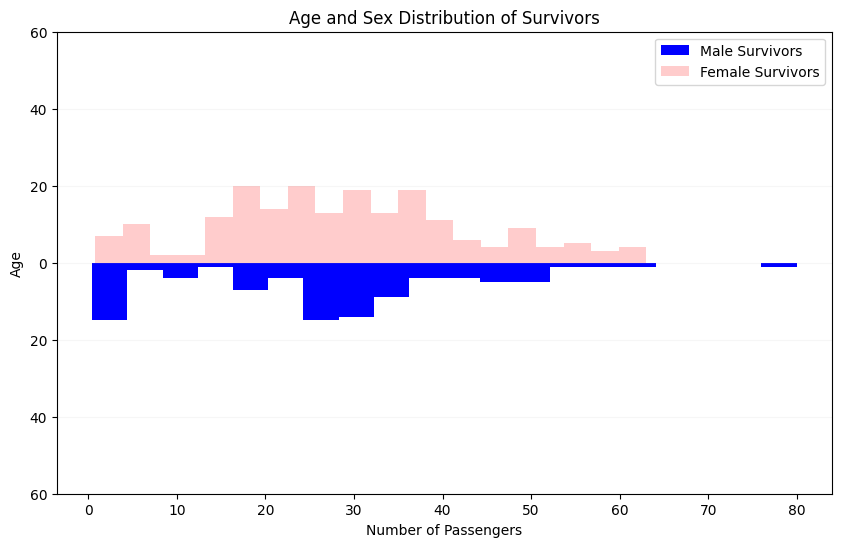

In [15]:
plt.figure(figsize=(12,8))
male_survivors = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age']
female_survivors = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age']
plt.figure(figsize=(10, 6))
plt.hist(male_survivors, bins=20, label='Male Survivors', orientation='vertical', color='blue', weights=[-1] * len(male_survivors))
plt.hist(female_survivors, bins=20, label='Female Survivors', orientation='vertical', color='red', alpha=0.2)
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age and Sex Distribution of Survivors')
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend()
plt.grid(axis='y', alpha=0.1)
plt.show()

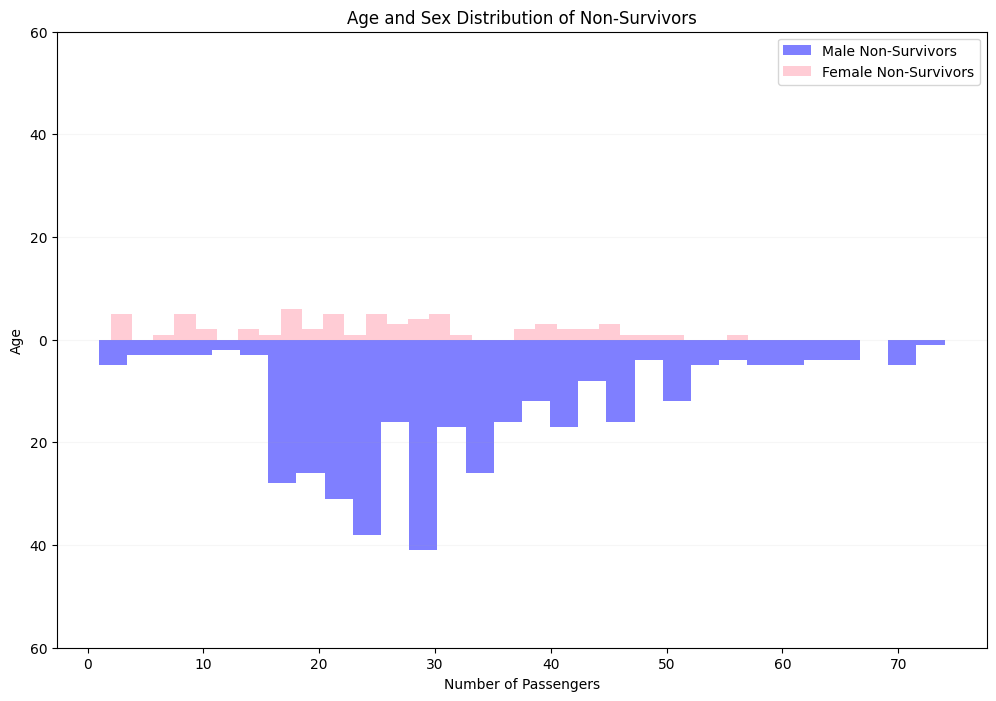

In [16]:
male_nonsurvivors = titanic[(titanic['sex']=='male') & (titanic['survived'] == 0)]['age']
female_nonsurvivors = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['age']
plt.figure(figsize=(12,8))
plt.hist(male_nonsurvivors, bins=30, label='Male Non-Survivors', orientation='vertical', color='blue', alpha=0.5, weights=[-1] * len(male_nonsurvivors))
plt.hist(female_nonsurvivors, bins=30, label='Female Non-Survivors', orientation='vertical', color='pink', alpha=0.8)
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age and Sex Distribution of Non-Survivors')
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend()
plt.grid(axis='y', alpha=0.1)
plt.show()

In [17]:
# Count the number of male and female passengers
total_male_passengers = titanic[titanic['sex'] == 'male'].shape[0]
total_female_passengers = titanic[titanic['sex'] == 'female'].shape[0]

# Print the results
print(f"Total number of male passengers: {total_male_passengers}")
print(f"Total number of female passengers: {total_female_passengers}")

Total number of male passengers: 577
Total number of female passengers: 314


From looking at the Pyramid plots for survival data split by sex, we can infer:
- Females had a higher survival rate across almost all ages. Even though total number of female passengers were significantly lower than male passegers, still their survival rates are higher. In the Pyramid plot of non-survived by sex, it is clear that a male perished with a significantly higher rate compares to females.
- Male, particularly older men, had a lower chance of survival.
- Children, regardless of sex, had higher survival rates.
This distribution shows that Titanic's evacuation policies, prioritized women and children.

**Optional Task: Exploring Additional Visualizations**
**Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot**
Create a bar graph, line plot, and scatter plot using the Titanic dataset.
Suggestions: You can explore variables like survival rates, passenger class, age, or fare in these plots. Question: What additional insights do these visualizations provide that weren't evident from the histograms and KDE plots?

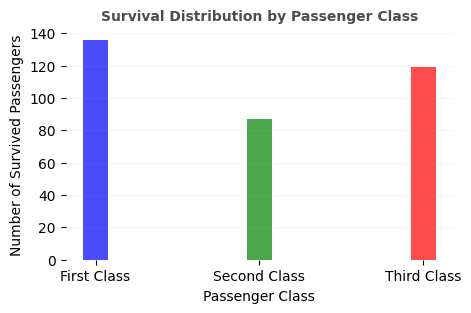

In [18]:
# 1. Bar Graph: Survival Rate by Passenger Class
first_class_survived_count = len(titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 1)])
second_class_survived_count = len(titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 1)])
third_class_survived_count = len(titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 1)])
# Create a list of the survival counts
survival_counts = [first_class_survived_count, second_class_survived_count, third_class_survived_count]
# Create a list of labels for the classes
labels = ['First Class', 'Second Class', 'Third Class']
# Plot the bar graph
plt.figure(figsize=(5, 3))
plt.bar(labels, survival_counts, alpha=0.7, color=['blue', 'green', 'red'], width=0.15)

plt.title('Survival Distribution by Passenger Class', fontsize=10, weight='bold', alpha=0.7)
plt.xlabel('Passenger Class', fontsize=10)
plt.ylabel('Number of Survived Passengers', fontsize=10)
plt.grid(axis='y', alpha=0.1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout
plt.show()

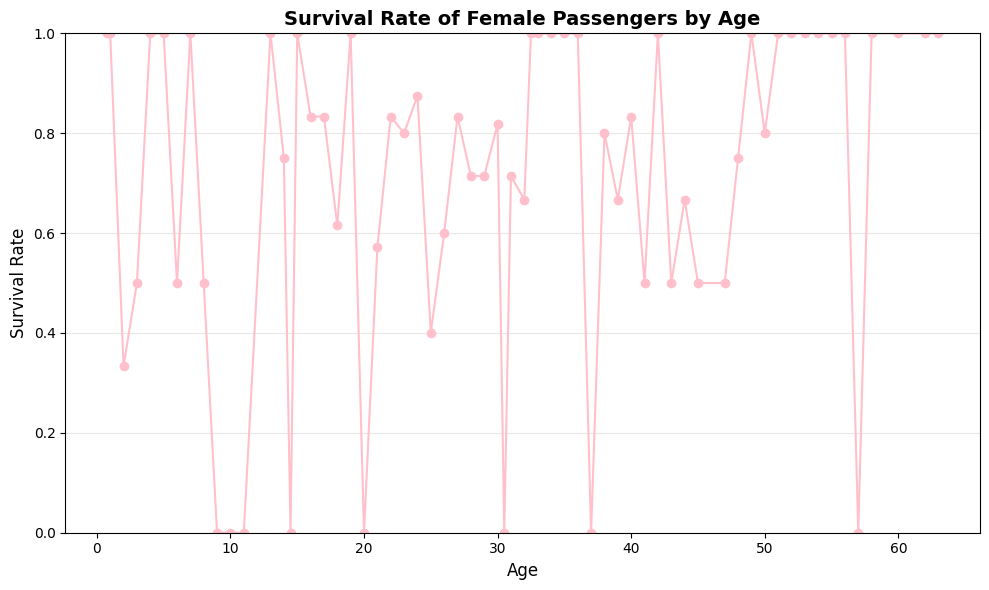

In [19]:
# Filter for female passengers
female_passengers = titanic[titanic['sex'] == 'female']

# Calculate survival rate by age
survival_rate = female_passengers.groupby('age')['survived'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(survival_rate.index, survival_rate.values, marker='o', linestyle='-', color='pink')

# Customize the plot
plt.title('Survival Rate of Female Passengers by Age', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for survival rate
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


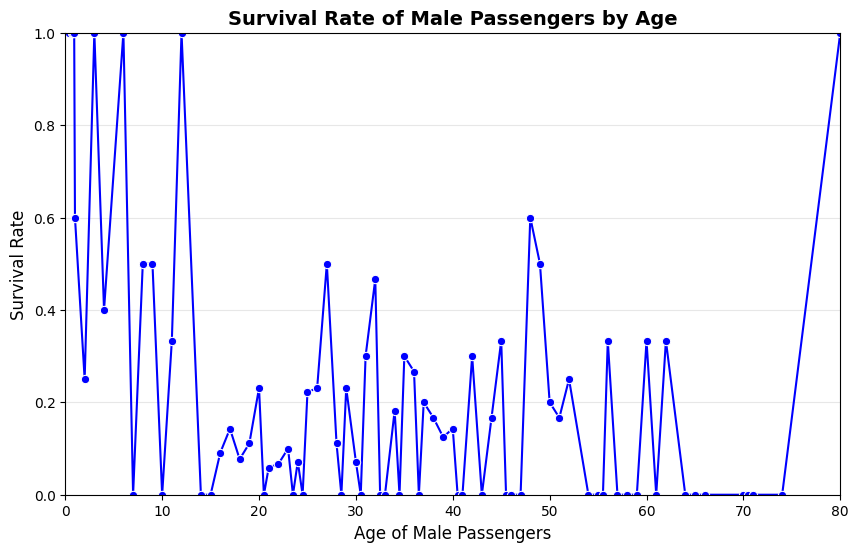

In [20]:
# Filter data for male passengers
male_passengers = titanic[titanic['sex'] == 'male']

# Calculate survival rate by age
age_survival_rate = male_passengers.groupby('age')['survived'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_survival_rate, x='age', y='survived', marker='o', color='blue')
plt.title('Survival Rate of Male Passengers by Age', fontsize=14, weight='bold')
plt.xlabel('Age of Male Passengers', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlim(0, 80)  # Adjust the x-axis limit based on the dataset
plt.ylim(0, 1)   # Survival rate is between 0 and 1
plt.grid(axis='y', alpha=0.3)
plt.show()

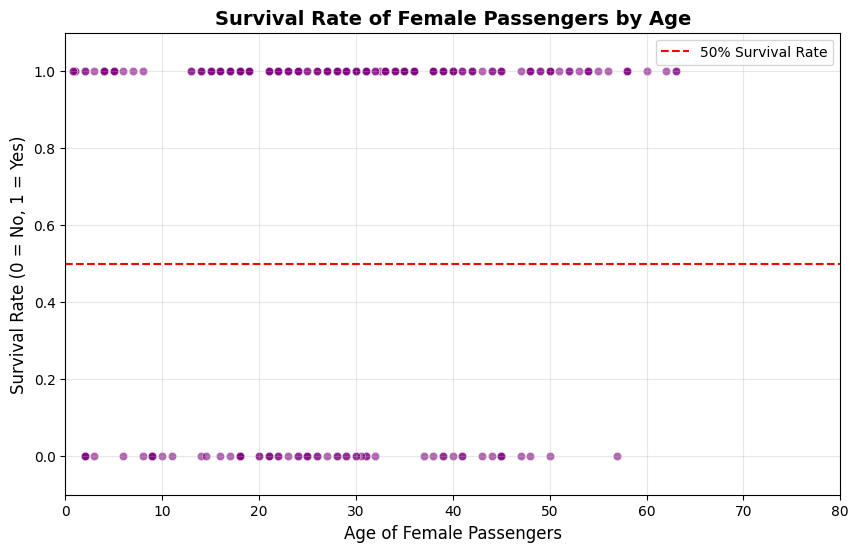

In [21]:
# Filter data for female passengers
female_passengers = titanic[titanic['sex'] == 'female']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=female_passengers, x='age', y='survived', alpha=0.6, color='purple')
plt.title('Survival Rate of Female Passengers by Age', fontsize=14, weight='bold')
plt.xlabel('Age of Female Passengers', fontsize=12)
plt.ylabel('Survival Rate (0 = No, 1 = Yes)', fontsize=12)
plt.xlim(0, 80)  # Adjust the x-axis limit based on the dataset
plt.ylim(-0.1, 1.1)  # Set y-axis limits for clarity
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Survival Rate')  # Optional: Add a reference line
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Sometimes graphs like scatter plot and lone plot can be a more clear representative of relationships ad help to interpret the data at a glance. So these graphs allow offer a more dynamic relationship between age, gender and survival rates.